In [107]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import re
import string
from collections import Counter
from nltk.corpus import stopwords
#bokeh 
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, Panel, Tabs, FactorRange
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
from bokeh.palettes import Spectral5
import bokeh.layouts as layouts
from bokeh.layouts import row
import bokeh.models.widgets as widgets
from bokeh.io import curdoc
from bokeh.transform import factor_cmap
from bokeh.transform import dodge
output_notebook()

Loading BokehJS ...

In [108]:
#Job ads
wb = ["Opportunity Overview The Turner Story Turner is a division of WarnerMedia along with our sister companies, HBO and Warner Bros., delivering brands like CNN, HLN, TNT, TBS, Adult Swim, Cartoon Network, Turner Sports and so much more! http://www.turner.com/  See what it’s like to work at Turner! Follow us on InstagramTwitter and Facebook  The Job The Revenue Analytics team developed a Data Warehouse and Business Intelligence Platform to unlock Turner's digital ad data and drive revenue growth for Turner's world class digital properties. The next phase of development will focus on building machine learning based products (e.g., forecasting tools, first-party audience segments) leveraging the existing data platform. The Senior Data Analyst will lead the development of these new capabilities in partnership with stakeholders in Product Management, Engineering, Revenue Operations, and Ad Sales.  The Daily • Analyze Turner's digital ad sales inventory, audience, and monetization data that will uncover new insights and business opportunities. • Build compelling data visualizations to communicate data-driven insight. • Develop machine learning models to help answer business questions and to create new data-driven capabilities. • Work closely with business stakeholders (Business Operations, Sales, Yield, etc.) to identify data-driven solutions for the digital ad sales business. • Build data-driven solutions using best in class cloud computing technology. • Partner with Data Engineering to develop data pipelines for onboarding, transforming and exposing new data sources. The Essentials • To be successful in the role, you'll need to be intellectually curious, detail-oriented, open to new ideas, and possess a strong aptitude for quantitative methods • The role requires a strong statistical background, familiarity with modern data warehouses, experience with SQL-like tools, and knowledge of scripting languages (e.g., python) • Experience with predictive modeling or machine learning a plus (e.g., data science, data mining) • 1+ years of analytics experience • Experience working with Python, Hive, Presto, and Spark • Experience working with machine learning packages (Spark ML, Scikit-learn) • Experience working with Looker a plus - Strong oral, written and presentation skills • Preference for prior technology or media company experience • Prior experience with AWS is a plus • Ability to partner with various teams (non-technical to technical) • Bachelors' degree preferred (Statistics, Engineering, Computer Science, Mathematics, Physics, etc.)The Perks • Paid time off every year to volunteer • Access to well-being tools, resources, and freebies • 2018 Best Company for Working Mothers • An in-house learning and development team to help shape and grow your careerTurner Broadcasting System, Inc. and its subsidiaries are Equal Opportunity Employers and E-Verify users. Qualified applicants will receive consideration for employment without regard to race, color, religion, sex, national origin, sexual orientation, gender identity, disability, or protected veteran status"]
hbo = ["Opportunity Overview  Build the Future of Entertainment HBO Max is WarnerMedia’s direct-to-consumer (DTC) offering debuting in May 2020. With over 10,000 hours of curated premium content anticipated at launch, HBO Max will offer powerhouse programming for everyone in the home, bringing together HBO, a robust slate of new original series, key third-party licensed programs and movies, and fan favorites from WarnerMedia’s rich library, including Company., New Line, DC, CNN, TNT, TBS, truTV, Turner Classic Movies, Cartoon Network, Adult Swim, Crunchyroll, Rooster Teeth, Looney Tunes, and more.  Our DTC team is laying the foundation for HBO Max, and we need highly motivated, uniquely skilled, and technically agile experts across a variety of disciplines to accomplish things that have never been done before.  The Job  As a Content Data Scientist on the HBO Max Data & Analytics team, you will join the exciting Content Intelligence & Metadata team to translate our programming and content executives' business requirements into analytical solutions. You will design and execute end-to-end analytical solutions within a cloud-based analytic infrastructure, partner with data engineering and analytic teams in transforming the insights into actionable endpoints, carrying the data science or analytical solution to production and managing the publication of the endpoints for downstream consumption. You also be involved in delivering the insights back to the creative business executives.  The Daily • Gather business requirements from our content, programming and product executives and translate those strategies, business questions into KPI's, data structures and analytical solutions to help them make their content acquisition, development, programing and scheduling decisions. • Work with data scientists and solution analysts to understand the business problems, proactively design intuitive data structures and create the best-suited data structures for modeling and analysis. • Design and execute multi-disciplinary analytic end points in a cloud-based data science infrastructure and co-ordinate the update/refresh cycles across different functional area. • Work with technology data engineers to facilitate publishing of analytic end points in an enterprise data lake as well as other stakeholder platforms. • Evaluate and facilitate the integration of additional sources of data that can enhance analytic capability, continually identify and fix issue that could enforce robust analytic process. • Assist in identifying and solving data quality concerns in analytic data transformation pipeline. • Work with the content intelligence team to enrich and improve our content metadata. • Maintain and own all workflow documents up to date.  The Essentials • BS/MS in Computer Science, engineer, mathematics or equivalent experience. • 3-4 years of relevant work experience. • Experience translating business needs & stakeholder questions into analytic frameworks. • Data wrangler extraordinaire (Python, R, SQL) who can bring analytical rigor to help guide data driven decision making. • Experience with AWS Solutions (S3, EMR, Glue, Sagemaker, Lambda, Step functions, Cloud Watch, etc.) • Strong knowledge of relational and non-relational databases (Snowflake, Redshift, DynamoDB) • Experience developing statistical models, advanced analytics and business intelligence. • Bias towards action & a willingness to iterate and improve methodologies over time. • Prizes pragmatically delivering value over analytical idealism. • Interest in shows & movies and understanding how & why viewers engage in content. • Experience building big data product and production pipelines to support data and analytic functions. • Familiar with various analytical and data science techniques and implement models and analyses developed with these techniques into production environment. • Flexibility and comfort working in a dynamic and some remote organization with minimal documentation and process. • Strong problem solving and conceptual thinking skills. • Entertainment or media industry a BIG plus.  The Perks • Exclusive WarnerMedia events and advance screenings • Paid time off every year to volunteer • Access to well-being tools, resources, and freebies • Access to in-house learning and development resources • Part of the WarnerMedia family of powerhouse brands  WarnerMedia is a leading media and entertainment company that creates and distributes premium and popular content from a diverse array of talented storytellers and journalists to global audiences through its consumer brands including: HBO, HBO Now, HBO Max, Company., TNT, TBS, truTV, CNN, DC Entertainment, New Line, Cartoon Network, Adult Swim, Turner Classic Movies and others.  Warner Media, LLC and its subsidiaries are equal opportunity employers.  Qualified candidates will receive consideration for employment without regard to race, color, religion, national origin, gender, sexual orientation, gender identity or expression, age, mental or physical disability, and genetic information, marital status, citizenship status, military status, protected veteran status or any other category protected by law"]   
twitch = ["Description  Data Scientists at Twitch influence critical product and business decisions and enable evidence-based decision-making at the highest levels of Twitch. Our Advertising product team is building out complex, auction-driven, multi-sided markets to help creators earn a living and advertisers drive business results. Our team seeks an outstanding data scientist with creative problem solving skills and demonstrated ability to deliver insights from complex data sets. You’ll draw on an expansive methodological toolkit to work on an array of challenging topics and problems including supply-demand modeling, econometrics, auction dynamics, pricing, forecasting, and maximizing the value of user action.  Responsibilities • Autonomously identify and pursue research with significant business impact, and make compelling cases for prioritization, resource allocation, and new product strategy • Prioritize and execute in the face of ambiguity, adapt your tools to answer complicated questions and identify the trade-offs between speed and quality of different approaches. • Establish product goals and success metrics, create approaches to track the data and troubleshoot errors, quantify and evaluate the data, then develop a common language for all colleagues to understand and drive these KPIs. • Collaborate with specialists in data science, analytics, engineering, and economics disciplines to efficiently develop reliable and reproducible analyses at scale • Support data processes - provide the team with ad-hoc analysis, automated dashboards, and self-service reporting tools so that everyone gets a good sense of the state of the business  Basic Qualifications • 4+ years of experience (or MS with 2+ years) as a data scientist on a technology product • Fluency in data-science fundamentals: SQL, data manipulation in R or Python, and statistics • Excellent written and verbal communication skills on quantitative topics • Expertise in applying supervised and unsupervised algorithms to large-scale data Preferred Qualifications • Prior work with marketplace or advertising or media products • Experience with data pipelining from data preparation to analysis to deployment • Excitement to shape the development of a growing team and help millions of content creators and viewers"]
edo = ["Hiring in Los Angeles, CA | New York, NY | San Francisco, CA  Who We Are  EDO is a data science software firm that develops analytics tools to make data accessible and actionable for the media and entertainment industry. Currently focused on film and TV, we work with many major movie studios and TV networks to help them forecast, market and distribute their content more effectively. Building from this strong base, we are growing into adjacent verticals.  We are a team of world-class engineers and data scientists backed by top leaders in entertainment and technology. Our co-founders and executive leadership have an established track record with other successful ventures.  What You Will Do • Generate data-driven insights to help guide client decision-making • Discover novel applications of data within entertainment • Work on a small team and take ownership of high impact projects • Work in a fast paced environment with continuous deployment and rapid product iteration • Meet and work directly with media and entertainment clients to understand their needs and translate into product solutions • Understand how the futures of media, entertainment and advertising are being defined by the innovative applications of technology and data • Learn about how a startup is built from an early stage  What We Are Looking For • Self-driven individuals who take ownership of their work • Ability to build products quickly and efficiently • Strong understanding of data science practices and principles • Interpersonal and communication skills to work on a small team • Willingness to learn about our clients and their unique problems • Experience with R or Python and comfort with databases  Benefits • Early-stage equity and competitive salary • Medical, dental, and vision insurance • Meals and snacks during work • Movie tickets, fitness discounts, commuter subsidies, and Apple hardware"]
disney = ["Supporting the Disney Advertising Sales organization within our new Direct To Consumer & International (DTCI) segment, the Data Science & Analytics team are subject matter experts in each of the following areas: Creating and optimizing audience segmentation models that enable us to target specific audiences based on brand affinities, app behavior, and video viewership among other things. Examining other ways to expand audience sizes and depth through look-alike modeling of behaviors within our own network of digital properties. Analyzing the performance of models in real-world campaigns and collaborating with the audience modeling team to optimize and refine the models. We’re looking for an intellectually curious, business-savvy, analytical powerhouse to join the Data Science & Analytics team as an Associate Data Scientist. In this role, you will be responsible for channeling data across the various Disney business units and data infrastructures, and building models to better understand our users at the individual level. Working collaboratively with cross-functional teams, you will develop, drive, and oversee new strategies to ensure the growth of the business and the overall bottom line. Bachelor's degree in a related field or equivalent work experience Minimum 1 year of work experience in media, advertising, or digital products driving measurable results (monetization, engagement) is highly preferred. Excellent understanding of statistics and the ability to confidently translate statistical analyses into compelling and actionable recommendations. Strong experience with writing SQL to extract and manipulate data at the source (experience with Hive/Hadoop/cloud data platforms a plus.) Experience with consumer behavior and insights analysis (transactional and usage). Self-motivated with the ability to work independently. Great communication and teamwork skills. Proven ability in predictive analytics and modeling. Experience or familiarity in survey data and analysis a plus. Knowledge of Salesforce DMP, Adobe Audience Manager, Oracle BlueKai or other DMPs a plus. Knowledge or background in data engineering is a plus. Apply statistical and modeling skills to enhance the understanding of our users at the individual level. Conduct hands-on research, business intelligence analysis and data mining on large, complex data sets to support the business. Ideate and collaborate on building predictive models and algorithms to optimize products. Work closely with DTCI Technology to provide requirements, offer input, and track progress on infrastructure and engineering work streams that are relevant to the business. Help grow a multichannel advertising technology capability by leveraging internal and external datasets to expand our reach within and across platforms. Through industry research, ongoing education, and practical experience, become a leading subject matter expert in digital user behavior, monetization, and engagement. Contribute in technical discussions on data standards and tooling. Required Education :  Bachelor's degree in a related field or equivalent work experiencePreferred Education :  Minimum 1 year of work experience in media, advertising, or digital products driving measurable results (monetization, engagement) is highly preferred. Excellent understanding of statistics and the ability to confidently translate statistical analyses into compelling and actionable recommendations. Strong experience with writing SQL to extract and manipulate data at the source (experience with Hive/Hadoop/cloud data platforms a plus.) Experience with consumer behavior and insights analysis (transactional and usage). Self-motivated with the ability to work independently. Great communication and teamwork skills. Proven ability in predictive analytics and modeling. Experience or familiarity in survey data and analysis a plus. Knowledge of Salesforce DMP, Adobe Audience Manager, Oracle BlueKai or other DMPs a plus. Knowledge or background in data engineering is a plus. Company Overview :  English"]


In [109]:
#combine list
companylist = wb + hbo + twitch + edo + disney
companylist = ' '.join(companylist)

In [125]:
#Text clean up
#remove punctuations and lower case and remove stop words and small words 
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['data', 'science', 'the', 'new', 'plus', 'The', 'Plus', 'hbo', 'disney', 'HBO', 'turner'])
punc = lambda x: re.sub("!|,|\?|\'|-|\"|&|。|\)|\(|！|，|\.*|/|\[|\]|\u2026|\d|:|~|、|？|☆|’|– |【|】|「|」|《|》|※| “|”|＊|→||[\b\.\b]{3}||@||@ |#|# |", '',x)

#Clean
def clean_text(text):
    stripped = re.sub(r'https?://[A-Za-z0-9./]+', '', text)
    words = stripped.split() 
    text = " ".join([word.lower() for word in words if word not in stopwords])
    punct = "".join([word for word in text if word not in string.punctuation])
    short_words = ' '.join([w for w in punct.split() if len(w)>2])
    ja_punct = ''.join([punc(word) for word in short_words])
    tokens = re.split('\W+', ja_punct)
    return (" ".join(tokens)).strip()

In [126]:
corpus = clean_text(companylist)

In [127]:
count = pd.DataFrame(Counter(corpus.split()).most_common())[0:50]
count.rename(columns={0:'word',1:'count'}, inplace = True)

In [128]:
#Bokeh Chart 
word = list(count['word'])
counts = list(count['count'])

source = ColumnDataSource(data=dict(word=word, counts=counts))

p = figure(x_range=word, y_range=(0, 30),  plot_width=1300, plot_height=500, title="Top 50 words",
           toolbar_location='below', tools="pan,wheel_zoom,box_zoom,reset")


p.vbar(x='word', top='counts', width=0.9, color = 'red', source=source)
p.title.align = 'center'
p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = "vertical"
p.left[0].formatter.use_scientific = False
p.add_tools(HoverTool(tooltips=[("Word", "@word"), ("Total Count", "@counts")]))

p.title.text_font_size = '20pt'
p.xaxis.axis_label="Word"
p.xaxis.axis_label_text_font_size = "15pt"
p.xaxis.major_label_text_font_size = "15pt"
p.xaxis.axis_label_text_color = "black"
p.yaxis.axis_label="Count"
p.yaxis.axis_label_text_font_size = "15pt"
p.yaxis.major_label_text_font_size = "15pt"
p.yaxis.axis_label_text_color = "black"


tbsource = ColumnDataSource(count)

columns = [TableColumn(field = 'word', title = 'word'),
          TableColumn(field = 'count', title = 'Count')]
data_table = DataTable(source = tbsource, columns = columns, width = 700, height = 700)

layout = row(p, data_table)

show(layout)

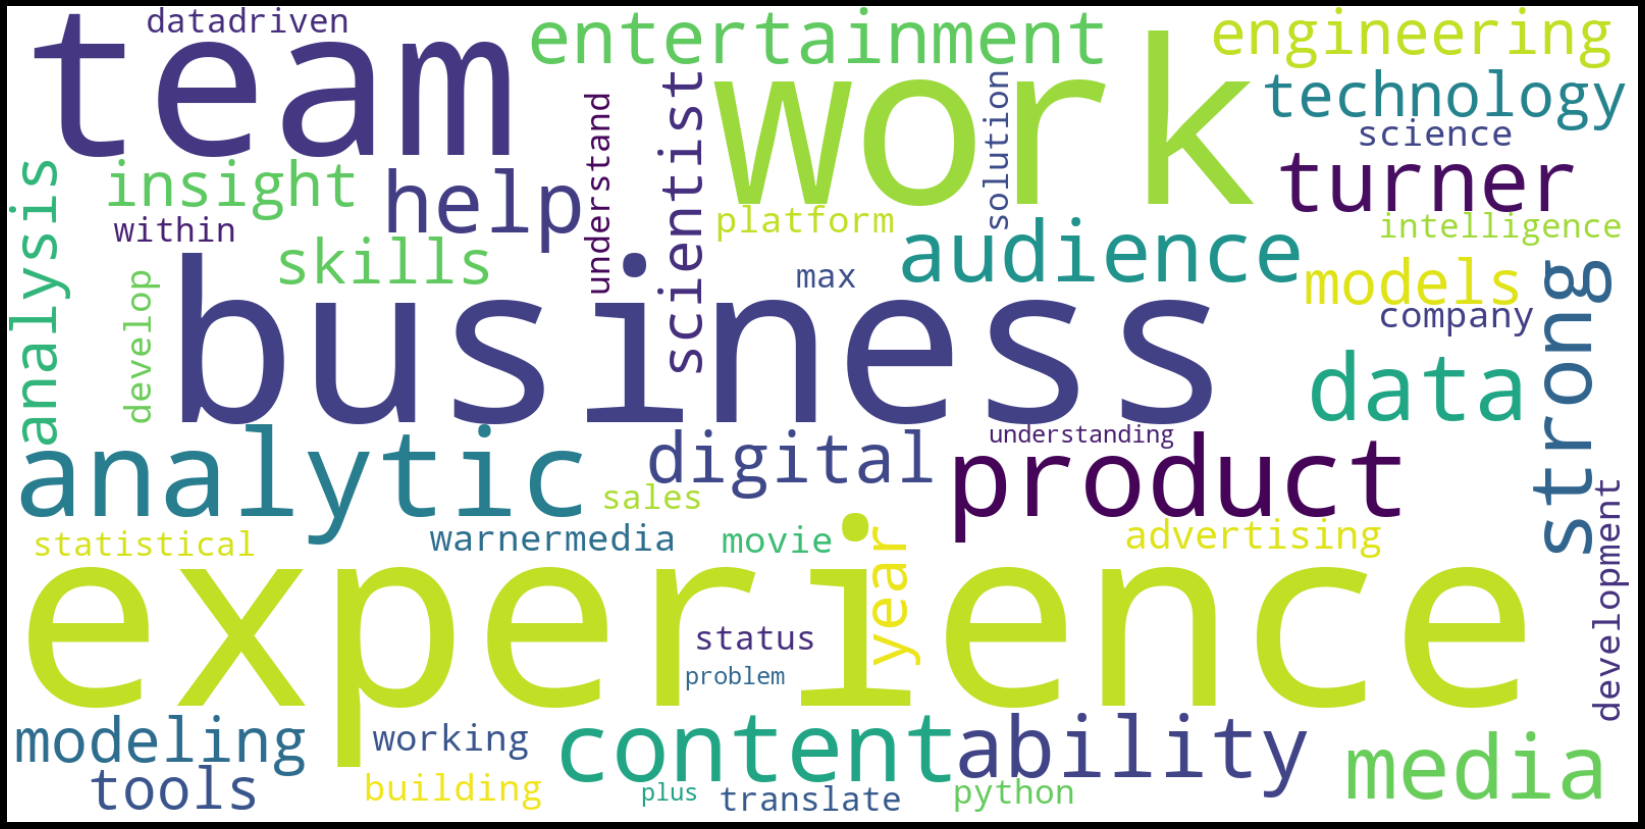

In [129]:
wc = WordCloud(background_color = 'white', max_words = 50, width=1600, height=800,\
                      contour_width = 2,contour_color ='black')
wc.generate(corpus)

plt.figure(figsize=(30,15),  facecolor='k')
plt.imshow(wc,  interpolation ='bilinear')
plt.axis("off")

plt.show()